In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Loading the dataset

In [130]:
df= pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [131]:
df.shape

(150, 5)

In [132]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [133]:
# To display statistics about data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [134]:
# to display basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [120]:
# to display no. od samples on each class
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### Preprocessing the dataset

In [121]:
# check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Expolatory Data Analysis

##### 1. Histograms

<Axes: >

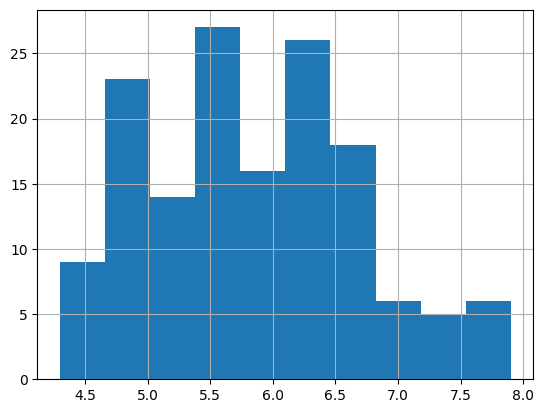

In [122]:
df['sepal_length'].hist()

<Axes: >

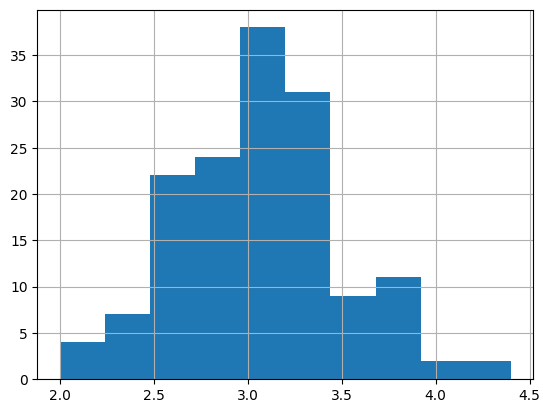

In [123]:
df['sepal_width'].hist()

<Axes: >

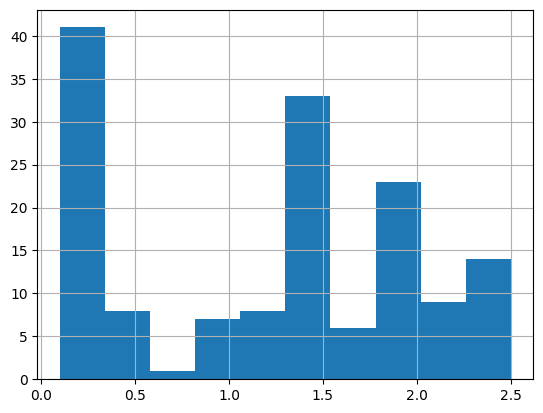

In [124]:
df['petal_width'].hist()

<Axes: >

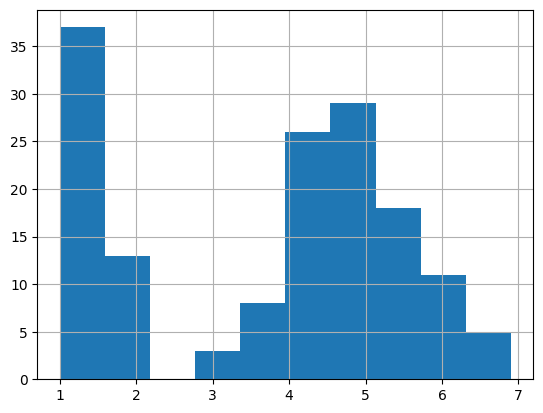

In [125]:
df['petal_length'].hist()

##### 2. Scatterplots

In [37]:
# define colors and classes
colors=['red','orange','blue']
species =['Iris-setosa','Iris-versicolor' ,'Iris-virginica'] 

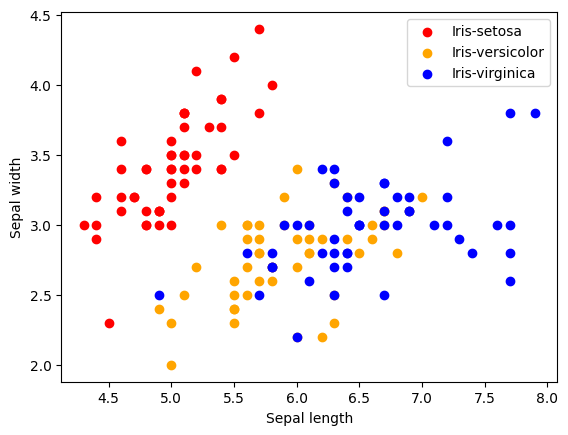

In [42]:
for i in range(3):
    x = df[df['species']== species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c= colors[i], label = species[i])
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.legend()

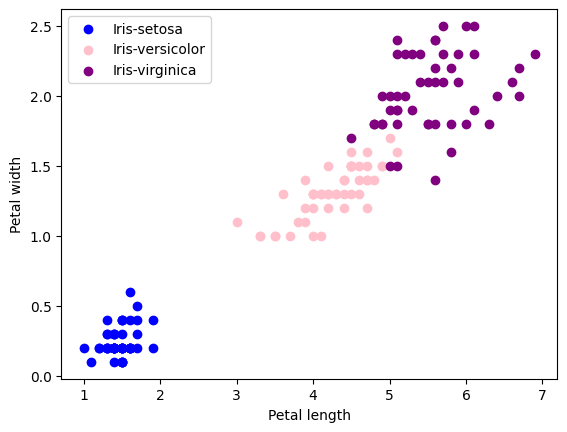

In [44]:
colors=['blue','pink','purple']
species =['Iris-setosa','Iris-versicolor' ,'Iris-virginica']
for i in range(3):
    x = df[df['species']== species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c= colors[i], label = species[i])
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.legend()

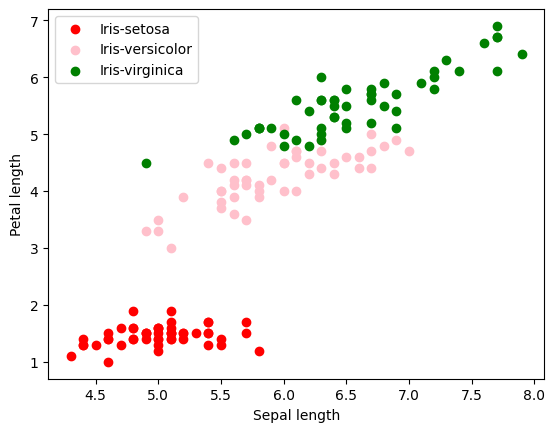

In [46]:
colors=['red','pink','green']
species =['Iris-setosa','Iris-versicolor' ,'Iris-virginica'] 
for i in range(3):
    x = df[df['species']== species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c= colors[i], label = species[i])
    plt.xlabel("Sepal length")
    plt.ylabel("Petal length")
    plt.legend()

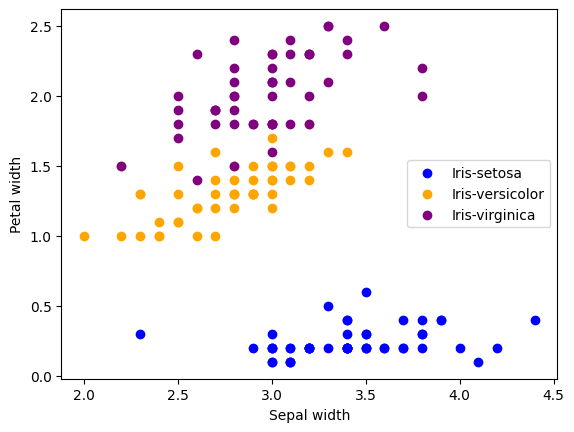

In [49]:
colors=['blue','orange','purple']
species =['Iris-setosa','Iris-versicolor' ,'Iris-virginica'] 
for i in range(3):
    x = df[df['species']== species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c= colors[i], label = species[i])
    plt.xlabel("Sepal width")
    plt.ylabel("Petal width")
    plt.legend()

### Correlation Matrix

A correlation matrix is a table showing correlation cofficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have high correlation, we can neglect one variable from those two.

In [107]:
data = df.drop(columns= 'species',axis=1)
print(data)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [108]:
correlation_matrix = data.corr()
print(correlation_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


<Axes: >

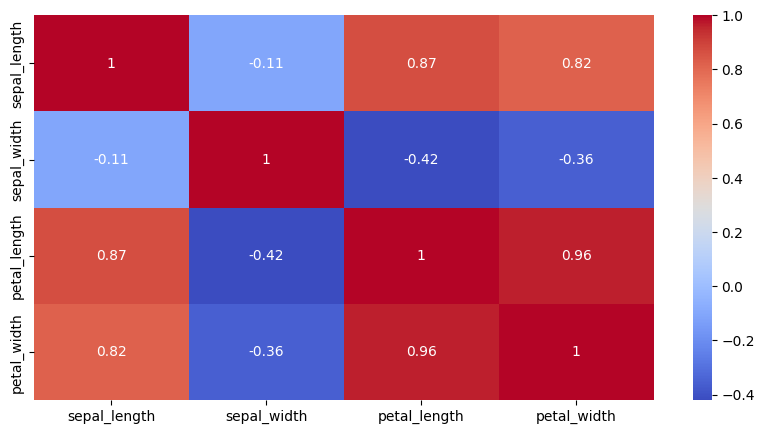

In [109]:
fig, ax=plt.subplots(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True, ax=ax, cmap= 'coolwarm')

 ### Label Encoder

In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns, These labels can be in the form of wordsor numbers. Labels encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [110]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [127]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Model Training

In [249]:
from sklearn.model_selection import train_test_split
# train = 70
# test = 30
x= df.drop(columns=['species'])
y=df['species']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

In [250]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [258]:
# model training
model.fit(x_train, y_train)

KNeighborsClassifier()

In [259]:
# print matrix to get performance
print("Accuracy: ", model.score(x_test,y_test)* 100)

Accuracy:  100.0


In [260]:
# knn- k-nearest neighnours
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier()

In [261]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [262]:
# print matrix to get performance
print("Accuracy: ", model.score(x_test,y_test)* 100)

Accuracy:  100.0


In [263]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [264]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [265]:
# print matrix to get performance
print("Accuracy: ", model.score(x_test,y_test)* 100)

Accuracy:  96.66666666666667


### Conclusion:

Logistic Regression model and KNeighborClassifier model have 100% accuracy level but DecisionTreeClassifier have 96.66% accuracy level